## In this Notebook we will implement simple linear regression from Scratch using NumPy



### We will be working on employees salary data set to predict salary of an employee based on their years of experience.

### 1. Import required libraries

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

### 2. Load data

In [2]:
# read csv data file with pandas
df = pd.read_csv("data/Salary_data.csv")

### 3. Exploratory Data Analysis (EDA)

In [3]:
# Let's check few initial rows of the data
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


##### As we can see, there are two columns in our dataset: 
* In the first column, We have years of experience of the employees.
* In second column, We have salaries of the employees.

In [4]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
# Check some general descriptive statistics (e.g., central tendency, dispersion etc.)
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Check for null or missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

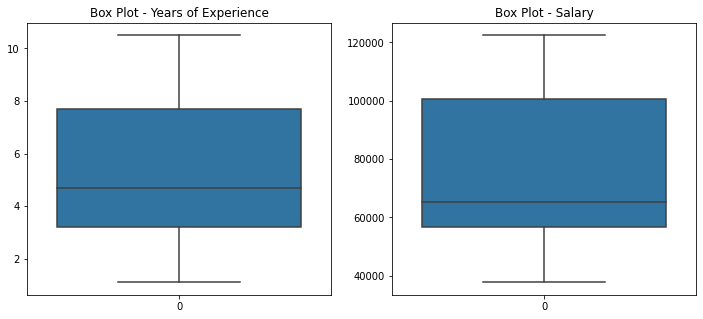

In [7]:
# Check for outliers: using box plot
fig,ax = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(ax=ax[0], data=df['YearsExperience'])
sns.boxplot(ax=ax[1], data=df['Salary'])

ax[0].set_title('Box Plot - Years of Experience')
ax[1].set_title('Box Plot - Salary')

plt.show()

#### Visualization

#### 1. Histogram 

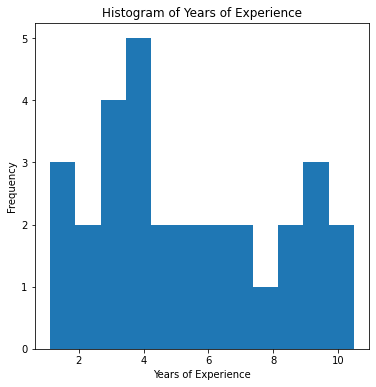

In [8]:
plt.figure(figsize=(6,6))
plt.hist(df['YearsExperience'], bins=12)
plt.title('Histogram of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

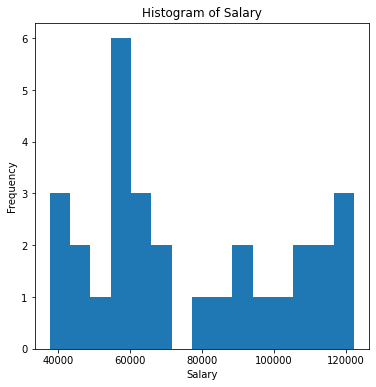

In [9]:
plt.figure(figsize=(6,6))
plt.hist(df['Salary'], bins=15)
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

#### 2. Scatter Plot

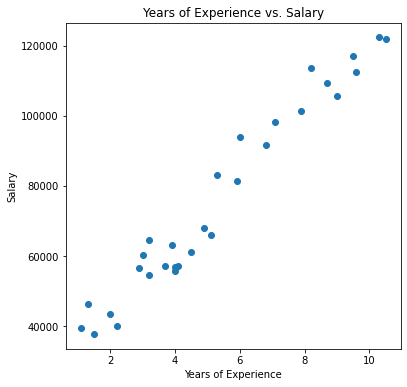

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

##### We can observe a sort of linear relationship between years of experience and salary of the employees.

### 4. Model building

In [11]:
# Define simple linear regression class
class Simple_LR:
    
    def __init__(self):
        self.slope = 0
        self.intercept = 0
        
    def fit(self, X_train, y_train):
        nr = 0
        dr = 0
        
        for i in range(len(X_train)):
            nr = nr + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            dr = dr + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))
        
        # slope or regression coefficient
        self.slope = nr / dr
        
        # intercept
        self.intercept = y_train.mean() - (self.slope * X_train.mean())
        
        print('Regression coefficient: ', self.slope)
        print('Intercept: ', self.intercept)
        
    def predict(self, X_test):            
        return (self.intercept + (self.slope * X_test)).reshape(len(X_test,))            

### 5. Create train and test sets

In [12]:
## Train-test split without sklearn

# Shuffle the dataset 
shuffle_df = df.sample(frac=1, random_state=2)

# Define a size for the train set 
train_size = int(0.8 * len(df))

# Train-test Split 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

X_train = train_set.iloc[:, :-1].values
y_train = train_set.iloc[:, -1].values

X_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, -1].values

### 6. Fit or train the model

In [13]:
# create simple linear regression class object and fit the data
SLR = Simple_LR()
SLR.fit(X_train, y_train)

Regression coefficient:  [9514.48910437]
Intercept:  [26010.40665728]


### 7. Predict on test set

In [14]:
y_pred = SLR.predict(X_test)

### 8. Plot the fitted line

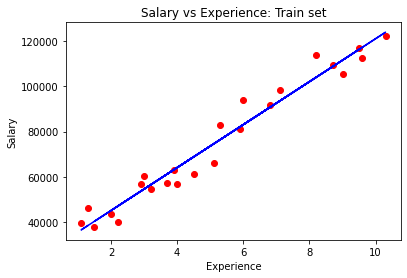

In [15]:
# Training data
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,SLR.predict(X_train),color="blue")
plt.title("Salary vs Experience: Train set")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

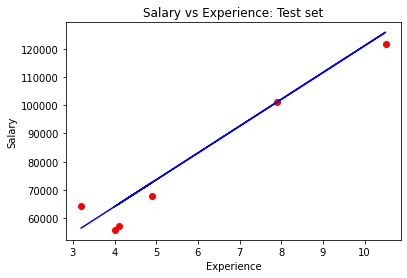

In [16]:
# Test data
plt.scatter(X_test,y_test,color="red")
plt.plot(X_test,y_pred,color="blue")
plt.title("Salary vs Experience: Test set")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

### 9. Model Evaluation 

In [17]:
''' Simple Linear Regression (SLR) Metrices: 
        * Mean absolute error (mae)
        * Mean squared error (mse)
        * R-squared (r2)
    '''
class slr_metrices:
    
    def __init__(self):
        self.mae = float('inf')
        self.mse = float('inf')
        self.r2 = 0
        
    def MAE(self, y_true, y_pred):
        self.mae = np.mean(np.abs(y_true - y_pred))
        return self.mae
    
    def MSE(self, y_true, y_pred):
        self.mse =  np.mean((y_true - y_pred)**2)
        return self.mse
        
    def R_squared(self, y_true, y_pred):
        y_true_mean = np.mean(y_true)
        
        ssr = np.sum((y_true - y_pred)**2)
        ssm = np.sum((y_true - y_true_mean)**2)
        self.r2 = 1 - (ssr/ssm)
        return self.r2

In [18]:
## evaluate the model
metrices = slr_metrices()

# On training data
y_pred_train = SLR.predict(X_train)

print('Training results: \n')
print('Mean absolute error (MAE):', metrices.MAE(y_train, y_pred_train))
print('Mean squared error (MSE):', metrices.MSE(y_train, y_pred_train))
print('Root Mean squared error (RMSE):', np.sqrt(metrices.MSE(y_train, y_pred_train)))
print('R-squared (r2):', metrices.R_squared(y_train, y_pred_train))

# On test data
print('\nTest results: \n')
print('Mean absolute error (MAE):', metrices.MAE(y_test, y_pred))
print('Mean squared error (MSE):', metrices.MSE(y_test, y_pred))
print('Root Mean squared error (RMSE):', np.sqrt(metrices.MSE(y_test, y_pred)))
print('R-squared (r2):', metrices.R_squared(y_test, y_pred))

Training results: 

Mean absolute error (MAE): 4471.642937823656
Mean squared error (MSE): 29786367.705509532
Root Mean squared error (RMSE): 5457.688861185615
R-squared (r2): 0.960459425229006

Test results: 

Mean absolute error (MAE): 5510.413034789554
Mean squared error (MSE): 38945297.96251431
Root Mean squared error (RMSE): 6240.616793435911
R-squared (r2): 0.9365607982057418


### 10. Save the trained model

In [19]:
from joblib import Parallel, delayed
import joblib

In [20]:
# Save the model as a pickle in a file
joblib.dump(SLR, 'trained_models\Simple_LR_NumPy.pkl')

['trained_models\\Simple_LR_NumPy.pkl']

### 11. Load the saved model

In [21]:
# Load the model from the file
model = joblib.load('trained_models\Simple_LR_NumPy.pkl')

### 12. Make prediction on a new data point using the saved model

In [22]:
yr_exp = 2.4
pred_salary = model.predict([[yr_exp]])
print(f'Predicted salary for the employees with {yr_exp} years of experience is: {pred_salary[0]}')

Predicted salary for the employees with 2.4 years of experience is: 48845.1805077677
